# OpenCV Master Class (Python)

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [25]:
img = cv2.imread('/content/demo_img.JPG', 0)

In [26]:
img.shape

(441, 418)

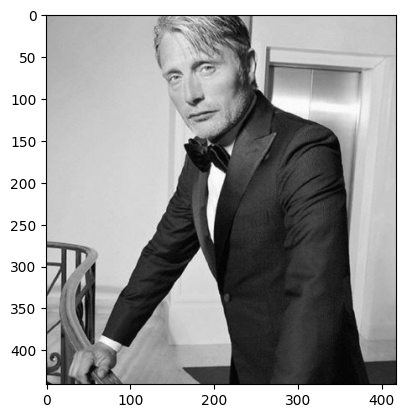

In [27]:
plt.imshow(img, cmap='gray')

In [19]:
img[100,100] = 255

array([[255, 161, 163, ..., 194, 190, 190],
       [255, 164, 165, ..., 191, 188, 188],
       [167, 255, 166, ..., 190, 192, 192],
       ...,
       [ 20,  22,  65, ...,  42,  40,  39],
       [ 21,  22,  18, ...,  36,  24,  24],
       [ 20,  24,  18, ...,  23,  21,  21]], dtype=uint8)
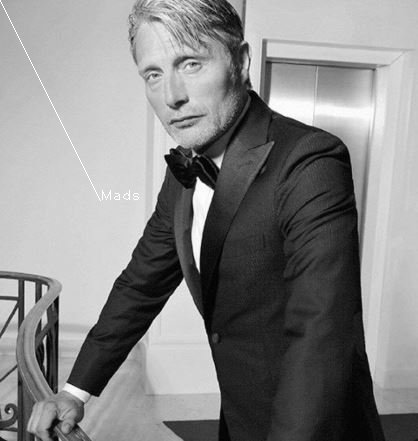

In [28]:
cv2.line(img, (0,0), (100,200), (255,255,255), 1)
cv2.putText(img, 'Mads', (100,200), 1, 1, (255,255,255))

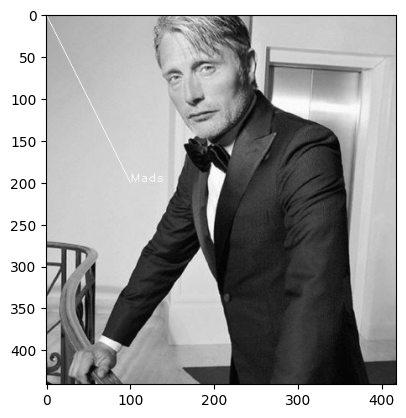

In [29]:
plt.imshow(img, cmap='gray')

In [35]:
img = cv2.imread('/content/demo_img.JPG')

In [36]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img2[200:300,:,1] = img2[200:300,:,1] * 1.15
img2 = cv2.cvtColor(img2, cv2.COLOR_HSV2BGR)

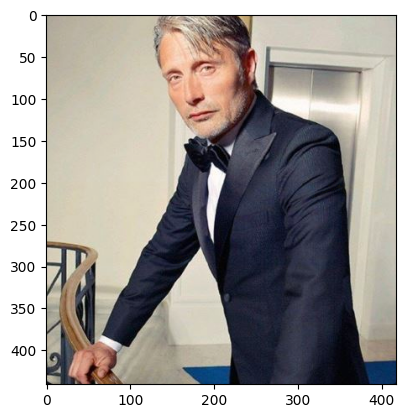

In [37]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

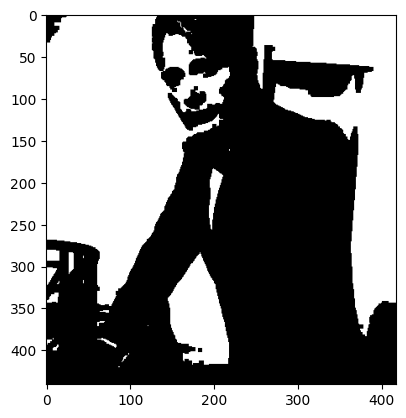

In [38]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2 = cv2.equalizeHist(img2)
_, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((5,5), np.uint8)
img2 = cv2.erode(img2, kernel)
plt.imshow(img2, cmap='gray')

In [39]:
img = cv2.imread('/content/demo_img.JPG', 0)

In [40]:
edges = cv2.Canny(img, 50, 100)

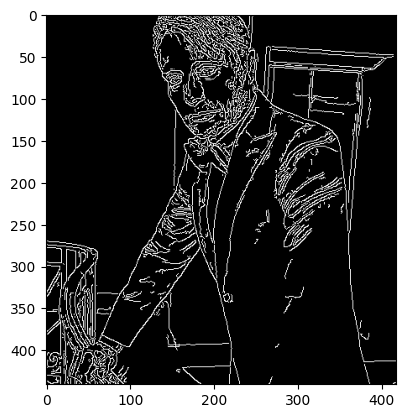

In [41]:
plt.imshow(edges, cmap='gray')

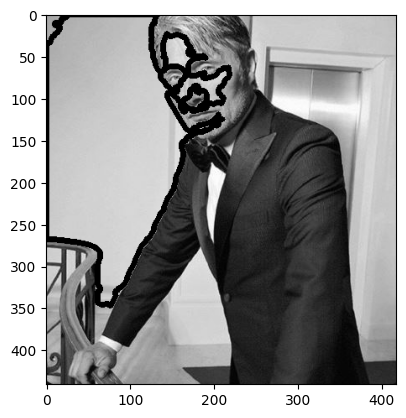

In [42]:
contours, _ = cv2.findContours(img2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
max_index = np.argmax(areas)
cv2.drawContours(img, contours, max_index, (0, 0, 255), 5)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [43]:
img = cv2.imread('/content/demo_img.JPG', 0)
f1 = np.fft.fft2(img)
f2 = np.fft.fftshift(f1)

In [44]:
spectrum = np.log((np.abs(f2)))

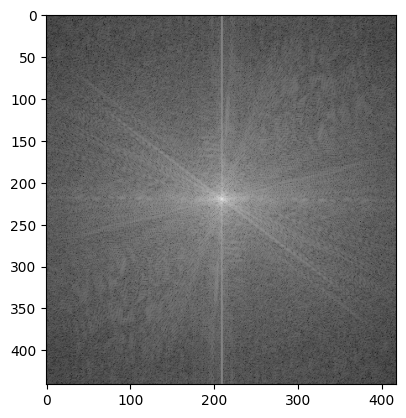

In [45]:
dst = np.array(spectrum, dtype=np.float32)
img_dst = cv2.normalize(dst, None, 0, 1, cv2.NORM_MINMAX)
plt.imshow(img_dst, cmap='gray')

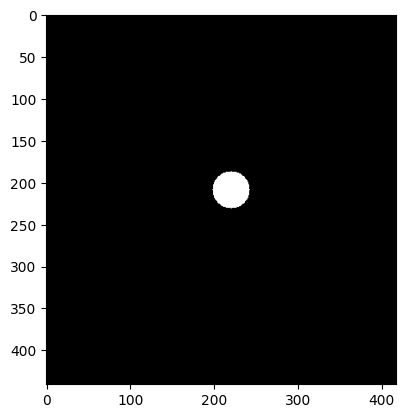

In [46]:
mask = np.zeros(f1.shape, np.uint8)
mask = np.array(mask, dtype=np.uint8)

k = 0.05
w,h = img.shape
cv2.circle(mask, ((int)(w/2), (int)(h/2)), (int)(w*k), (255,255,255), -1)
plt.imshow(mask, cmap='gray')

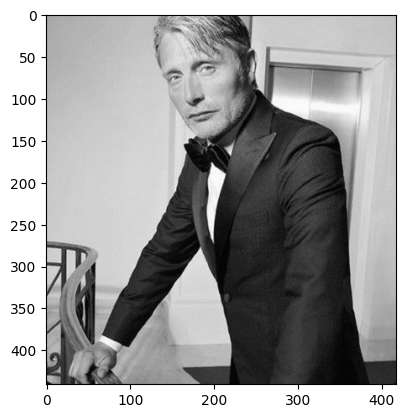

In [47]:
conv_img = np.fft.ifft2(np.fft.ifftshift(f2)).real
img_dst = np.array(conv_img, dtype=np.uint8)
plt.imshow(img_dst, cmap='gray')